Import Libraries & Dependencies

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

Load & Preview the Data

In [ ]:
#load and read the dataset
df = pd.read_csv("../../data/maildata.csv")

#print the first few rows
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


Check Data info and Missing Values

In [41]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
Category    0
Message     0
dtype: int64


Count messages are spam or ham

In [42]:
print(df['Category'].unique())
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

#Spam email as 0 and Ham emails as 1

print("Total email messaages: ",len(df))
print("Spam email messages: ",df[df['Category'] == 0].shape[0])
print("Ham email messages: ",df[df['Category'] == 1].shape[0])


['ham' 'spam']
Total email messaages:  5572
Spam email messages:  747
Ham email messages:  4825


Visualize Distribution

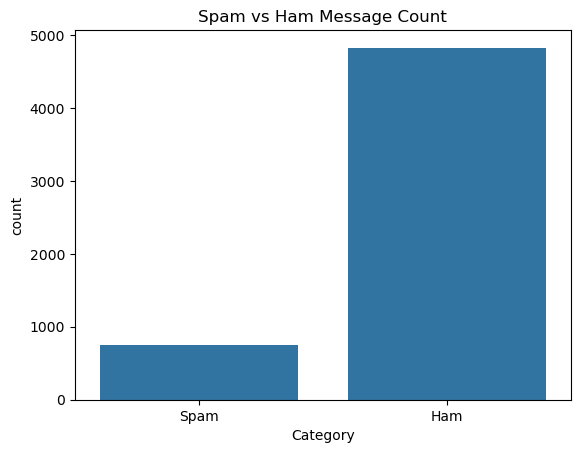

In [43]:
sns.countplot(x='Category', data=df)
plt.xticks([0,1], ['Spam', 'Ham'])
plt.title("Spam vs Ham Message Count")
plt.show()

Message Length Analysis

           count       mean        std  min    25%    50%    75%    max
Category                                                               
0          747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0
1         4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0


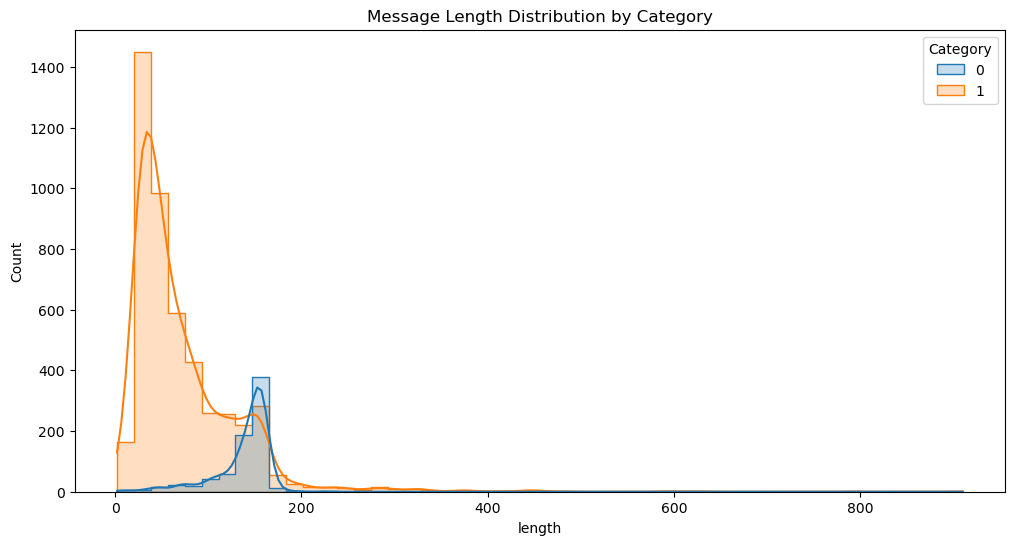

In [44]:
df['length'] = df['Message'].apply(len)

#basic stats of message length
print(df.groupby('Category')['length'].describe())

#length distribution by class
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='length', hue='Category', bins=50, kde=True, element='step')
plt.title("Message Length Distribution by Category")
plt.show()

Word Count Analysis

In [45]:
df['word_count'] = df['Message'].apply(lambda x:len(x.split()))

print(df.groupby('Category')['word_count'].describe())

           count       mean        std  min   25%   50%   75%    max
Category                                                            
0          747.0  23.812584   5.956923  1.0  22.0  25.0  28.0   35.0
1         4825.0  14.310259  11.517945  1.0   7.0  11.0  19.0  171.0


Most common words in Spam emails vs Ham emails

Category
1    4823
0     747
Name: count, dtype: int64


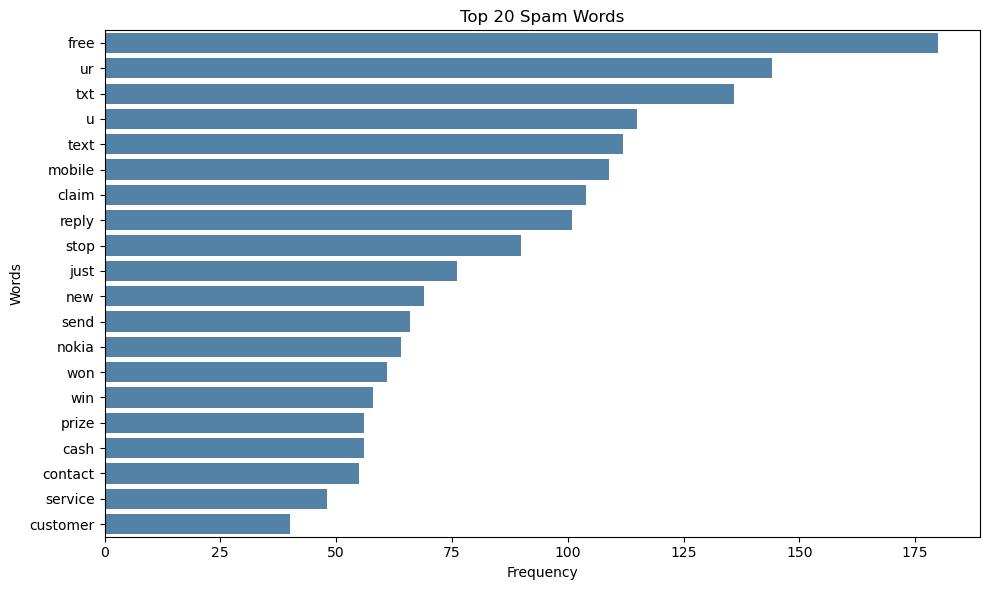

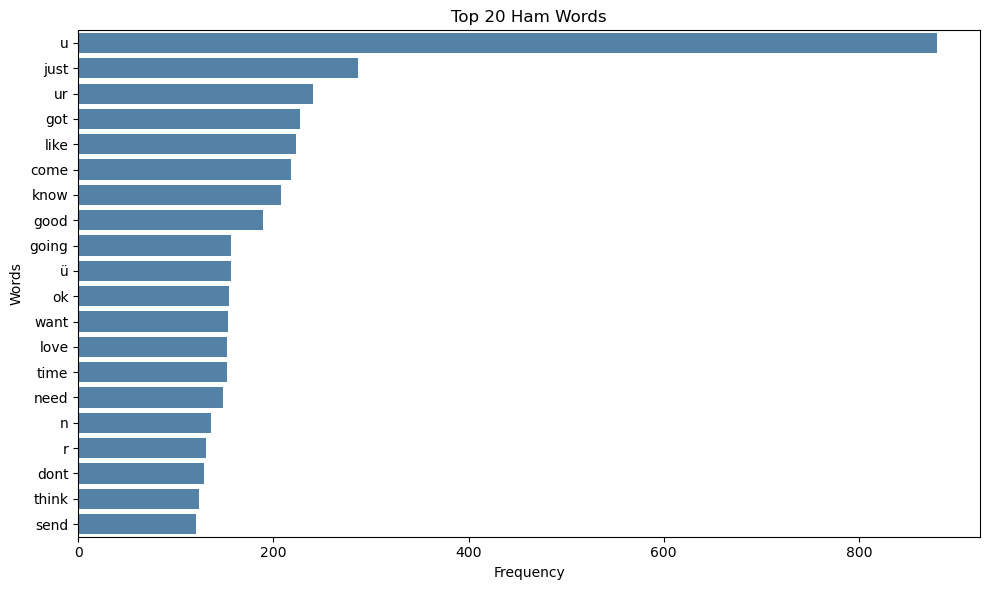


Top spam words: [('free', 180), ('ur', 144), ('txt', 136), ('u', 115), ('text', 112), ('mobile', 109), ('claim', 104), ('reply', 101), ('stop', 90), ('just', 76), ('new', 69), ('send', 66), ('nokia', 64), ('won', 61), ('win', 58), ('prize', 56), ('cash', 56), ('contact', 55), ('service', 48), ('customer', 40)]

Top ham words: [('u', 880), ('just', 287), ('ur', 241), ('got', 227), ('like', 223), ('come', 218), ('know', 208), ('good', 189), ('going', 157), ('ü', 157), ('ok', 155), ('want', 154), ('love', 153), ('time', 153), ('need', 148), ('n', 136), ('r', 131), ('dont', 129), ('think', 124), ('send', 121)]


In [47]:
df = df[1:]  

# Convert Category to int
df['Category'] = df['Category'].astype(int)

# OPTIONAL sanity check
print(df['Category'].value_counts())  # Just to see how many 0s and 1s you have

# Function to get most common words
def get_mostCommonWords(messages, stopwords=ENGLISH_STOP_WORDS, n=20):
    words = ' '.join(messages).lower().split()
    words = [word for word in words if word.isalpha() and word not in stopwords]
    return Counter(words).most_common(n)

# Apply function to spam and ham
spam_words = get_mostCommonWords(df[df['Category'] == 0]['Message'])
ham_words = get_mostCommonWords(df[df['Category'] == 1]['Message'])

def plot_top_words(word_list, title):
    words, counts = zip(*word_list)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words), color='steelblue')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()


# Plot top spam and ham words
plot_top_words(spam_words, "Top 20 Spam Words")
plot_top_words(ham_words, "Top 20 Ham Words")

print("\nTop spam words:", spam_words)
print("\nTop ham words:", ham_words)